## 3-1 データ数，種類数の算出

In [1]:
import pandas as pd
import os


def load_hotel_reserve():
  customer_tb = pd.read_csv('../../../data/customer.csv')
  hotel_tb = pd.read_csv('../../../data/hotel.csv')
  reserve_tb = pd.read_csv('../../../data/reserve.csv')
  return customer_tb, hotel_tb, reserve_tb

customer_tb, hotel_tb, reserve_tb = load_hotel_reserve()


In [28]:
#not awesome
# 下の行から本書スタート
# groupby関数でreserve_idを集約単位に指定し、size関数でデータ数をカウント
# groupby関数の集約処理によって行番号（index）がとびとびになっているので、
# reset_index関数によって、集約単位に指定したhotel_idを集約した状態から列名に戻し、
# 新たな行名を現在の行番号を直す
rsv_cnt_tb = reserve_tb.groupby('hotel_id').size().reset_index()

# 集約結果の列名を設定
rsv_cnt_tb.columns = ['hotel_id', 'rsv_cnt']
rsv_cnt_tb.head()

,hotel_id,rsv_cnt
0,h_1,10
1,h_10,3
2,h_100,20
3,h_101,17
4,h_102,13


In [42]:
#not awesome
# groupbyでhotel_idを集約単位に指定し、
# customer_idの値をnunique関数することで顧客数をカウント
cus_cnt_tb = \
  reserve_tb.groupby('hotel_id')['customer_id'].nunique().reset_index()

cus_cnt_tb.columns = ['hotel_id', 'cus_cnt']

cus_cnt_tb.head()

,hotel_id,cus_cnt
0,h_1,10
1,h_10,3
2,h_100,19
3,h_101,17
4,h_102,13


In [43]:
#not awesome

# merge関数を用いて、hotel_idを結合キーとして結合(「第4章 結合」で解説)
pd.merge(rsv_cnt_tb, cus_cnt_tb, on='hotel_id').head()

,hotel_id,rsv_cnt,cus_cnt
0,h_1,10,10
1,h_10,3,3
2,h_100,20,19
3,h_101,17,17
4,h_102,13,13


### pandas.core.groupby.DataFrameGroupBy.agg
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html


Different aggregations per column
```
>>> df = pd.DataFrame({'A': [1, 1, 2, 2],
...                    'B': [1, 2, 3, 4],
...                    'C': np.random.randn(4)})

>>> df
   A  B         C
0  1  1  0.362838
1  1  2  0.227877
2  2  3  1.267767
3  2  4 -0.562860

>>> df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
    B             C
  min max       sum
A
1   1   2  0.590716
2   3   4  0.704907
```

In [80]:
# 下の行から本書スタート
# agg関数を利用して、集約処理をまとめて指定
# reserve_idを対象にcount関数を適用
# customer_idを対象にnunique関数を適用
result = reserve_tb \
  .groupby('hotel_id') \
  .agg({'reserve_id': 'count', 'customer_id': 'nunique'})

# reset_index関数によって、列番号を振り直す（inplace=Trueなので、直接resultを更新）
result.reset_index(inplace=True)
result.columns = ['hotel_id', 'rsv_cnt', 'cus_cnt']


In [81]:
result.head()

,hotel_id,rsv_cnt,cus_cnt
0,h_1,10,10
1,h_10,3,3
2,h_100,20,19
3,h_101,17,17
4,h_102,13,13


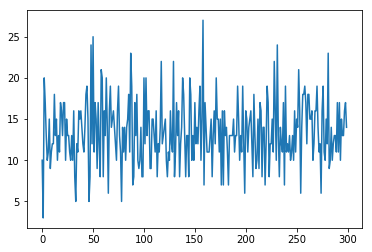

In [82]:
result['rsv_cnt'].plot()